## Tool tracking

### 1. Imports

In [77]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from tqdm import tqdm
from sklearn.cluster import KMeans

from helpers.view_detection import get_view_mask


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


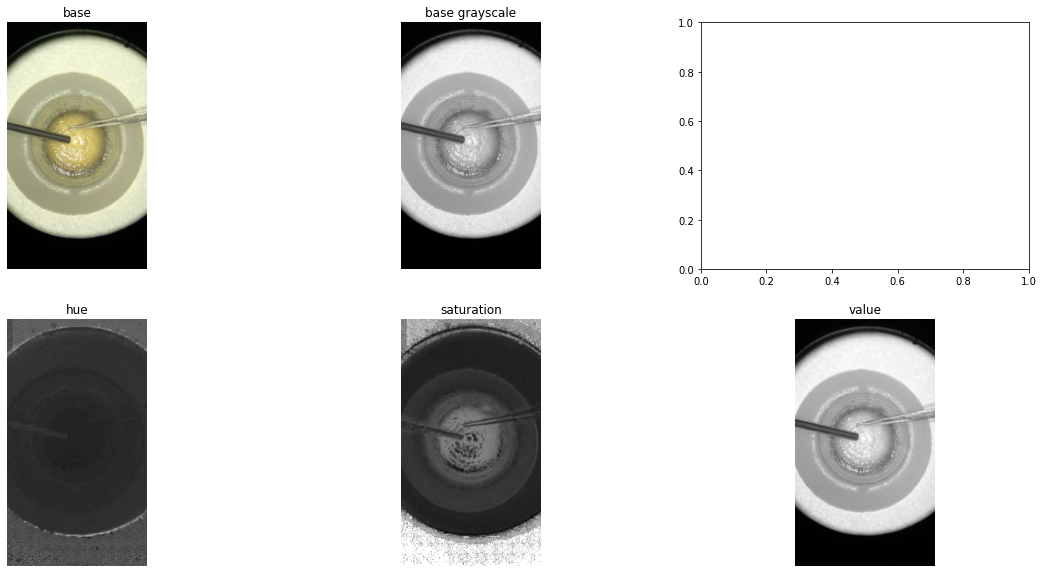

size: 290x512


In [14]:
scale = 0.33

base = cv2.imread('data/artificial/bioniko_rhexis_base3.png', cv2.IMREAD_COLOR)
base = cv2.resize(base, (0, 0), fx=scale, fy=scale)

base_rgb = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)
base_gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)
base_hsv = cv2.cvtColor(base, cv2.COLOR_BGR2HSV)

base_hue = base_hsv[:, :, 0]
base_saturation = base_hsv[:, :, 1]
base_value = base_hsv[:, :, 2]

fig, ((plot1, plot2, _), (plot3, plot4, plot5)
      ) = plt.subplots(2, 3, figsize=(20, 10))
plot1.set_title('base')
plot1.imshow(base_rgb)
plot1.axis('off')

plot2.set_title('base grayscale')
plot2.imshow(base_gray, cmap=plt.cm.gray)
plot2.axis('off')

plot3.set_title('hue')
plot3.imshow(base_hue, cmap=plt.cm.gray)
plot3.axis('off')

plot4.set_title('saturation')
plot4.imshow(base_saturation, cmap=plt.cm.gray)
plot4.axis('off')

plot5.set_title('value')
plot5.imshow(base_value, cmap=plt.cm.gray)
plot5.axis('off')

plt.show()

print('size: %dx%d' % (base.shape[1], base.shape[0]))

16 detected


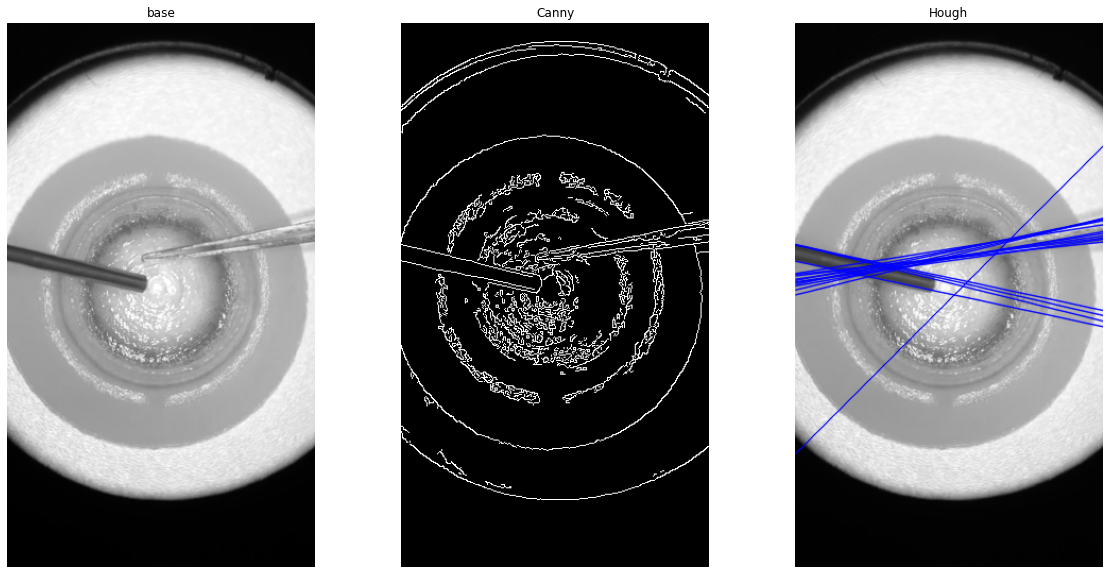

In [70]:
edge_map = cv2.Canny(base_value, 50, 200, None, 3)
    
vis = cv2.cvtColor(base_value, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edge_map, 1, np.pi / 180, 80, None, 0, 0)

if lines is not None:
#     for i in range(0, len(lines)):
    for i in range(min(20, len(lines))):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(vis, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)

print(f'{len(lines)} detected')
fig, plots = plt.subplots(1, 3, figsize=(20, 10))
plots[0].set_title('base')
plots[0].imshow(base_value, cmap='gray')
plots[0].axis('off')

plots[1].set_title('Canny')
plots[1].imshow(edge_map, cmap='gray')
plots[1].axis('off')

plots[2].set_title('Hough')
plots[2].imshow(vis)
plots[2].axis('off')

plt.show()

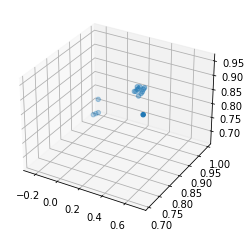

In [84]:
top_count = 50
lines_top = lines[:min(top_count, lines.shape[0])]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(np.cos(lines_top[:,0,1]), np.sin(lines_top[:,0,1]), lines_top[:,0,0]/300)

In [85]:
Z = np.array([np.cos(lines_top[:,0,1]), np.sin(lines_top[:,0,1]), lines_top[:,0,0]]).T
kmeans = KMeans(n_clusters=2).fit(Z)
kmeans.labels_


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

In [ ]:
# >>> from sklearn.cluster import KMeans
# >>> import numpy as np
# >>> X = np.array([[1, 2], [1, 4], [1, 0],
# ...               [10, 2], [10, 4], [10, 0]])
# >>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# >>> kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# >>> kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
# >>> kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

In [76]:
lines_top[:,0,0].max()

286.0